In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('C:/Users/kavitha/Downloads/Excel_Final_Eval_Project (2).csv')
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,Region,Category,Sub-Category,Product Name,Sales,Quantity,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,2.5164


In [3]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['Sales'] < lower_limit) | (df['Sales'] > upper_limit)]
print("Number of outliers:", outliers.shape[0])


Number of outliers: 1167


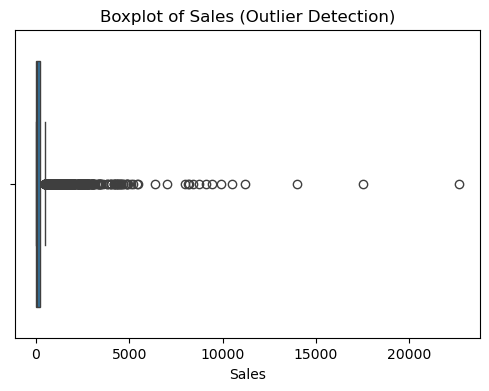

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Sales'])
plt.title('Boxplot of Sales (Outlier Detection)')
plt.show()


In [6]:
df.shape

(9994, 15)

In [7]:
# Cap outliers
df['Sales'] = df['Sales'].clip(lower=lower_limit, upper=upper_limit)

print("Outliers capped successfully!")

Outliers capped successfully!


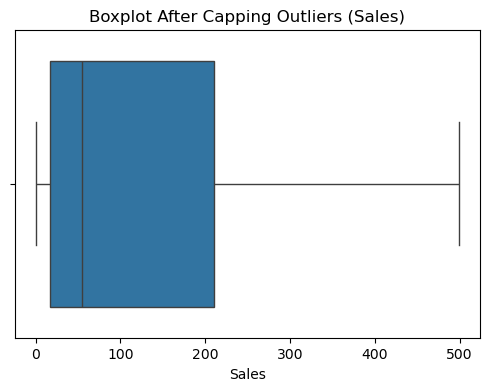

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Sales'])
plt.title('Boxplot After Capping Outliers (Sales)')
plt.show()


In [18]:
Q1=df['Profit'].quantile(0.25)
Q3=df['Profit'].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
outliers=df[(df['Profit']<lower_limit)|(df['Profit']>upper_limit)]
print("Number of outliers:",outliers.shape[0])

Number of outliers: 1881


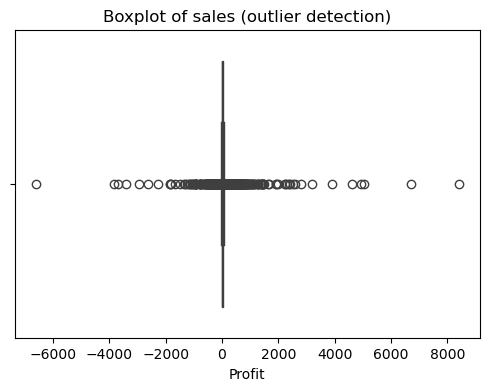

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Profit'])
plt.title('Boxplot of sales (outlier detection)')
plt.show()

In [21]:
df['Profit']=df['Profit'].clip(lower=lower_limit,upper=upper_limit)
print("Outliers capped successfully")

Outliers capped successfully


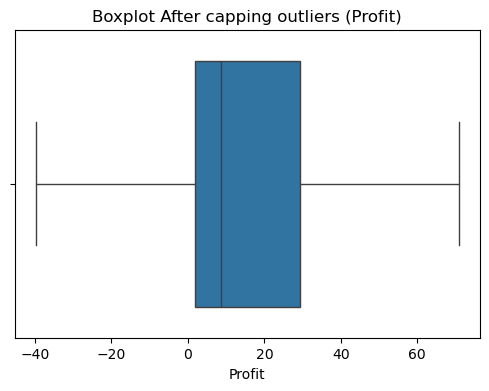

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Profit'])
plt.title('Boxplot After capping outliers (Profit)')
plt.show()

In [23]:
for col in df.select_dtypes(include='object'):
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts().head())



Value counts for Order ID:
Order ID
CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
CA-2015-131338    10
Name: count, dtype: int64

Value counts for Order Date:
Order Date
9/5/2016      38
9/2/2017      36
11/10/2016    35
12/1/2017     34
12/2/2017     34
Name: count, dtype: int64

Value counts for Ship Date:
Ship Date
12/16/2015    35
9/26/2017     34
12/6/2017     32
11/21/2017    32
9/6/2017      30
Name: count, dtype: int64

Value counts for Ship Mode:
Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

Value counts for Customer ID:
Customer ID
WB-21850    37
JL-15835    34
MA-17560    34
PP-18955    34
CK-12205    32
Name: count, dtype: int64

Value counts for Segment:
Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

Value counts for Country:
Country
United States    9994
Name: count, dtype: int64

Value counts for City:
C

In [24]:
df.corr(numeric_only=True)


,Sales,Quantity,Profit
Sales,1.000000,0.265072,0.450223
Quantity,0.265072,1.000000,0.196820
Profit,0.450223,0.196820,1.000000


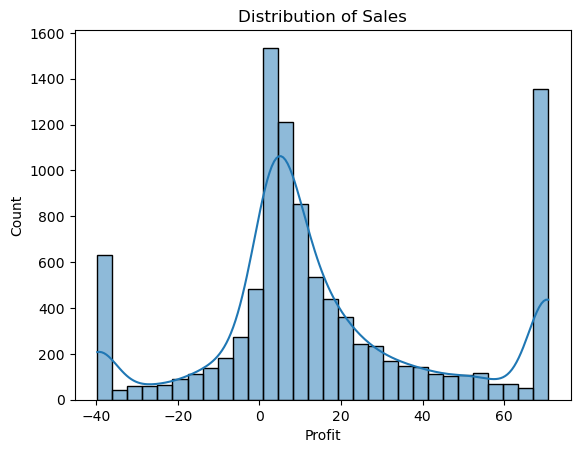

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Distribution of Sales
sns.histplot(df['Profit'], bins=30, kde=True)
plt.title("Distribution of Sales")
plt.show()


In [29]:
df.corr(numeric_only=True)

,Sales,Quantity,Profit
Sales,1.000000,0.265072,0.450223
Quantity,0.265072,1.000000,0.196820
Profit,0.450223,0.196820,1.000000


In [30]:
df.isnull().sum()

Order ID        0
Order Date      0
Ship Date       0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
Region          0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Profit          0
dtype: int64

In [33]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [34]:
df['City'].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [35]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [37]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [38]:
df['Sub-Category'].unique()  

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [39]:
df.dtypes

Order ID         object
Order Date       object
Ship Date        object
Ship Mode        object
Customer ID      object
Segment          object
Country          object
City             object
Region           object
Category         object
Sub-Category     object
Product Name     object
Sales           float64
Quantity          int64
Profit          float64
dtype: object

In [42]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])


In [43]:
df.dtypes

Order ID                object
Order Date      datetime64[ns]
Ship Date       datetime64[ns]
Ship Mode               object
Customer ID             object
Segment                 object
Country                 object
City                    object
Region                  object
Category                object
Sub-Category            object
Product Name            object
Sales                  float64
Quantity                 int64
Profit                 float64
dtype: object

In [44]:
df['Ship Mode'] = df['Ship Mode'].str.strip().str.title()
df['Category'] = df['Category'].str.strip().str.title()


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Ship Date     9994 non-null   datetime64[ns]
 3   Ship Mode     9994 non-null   object        
 4   Customer ID   9994 non-null   object        
 5   Segment       9994 non-null   object        
 6   Country       9994 non-null   object        
 7   City          9994 non-null   object        
 8   Region        9994 non-null   object        
 9   Category      9994 non-null   object        
 10  Sub-Category  9994 non-null   object        
 11  Product Name  9994 non-null   object        
 12  Sales         9994 non-null   float64       
 13  Quantity      9994 non-null   int64         
 14  Profit        9994 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int6

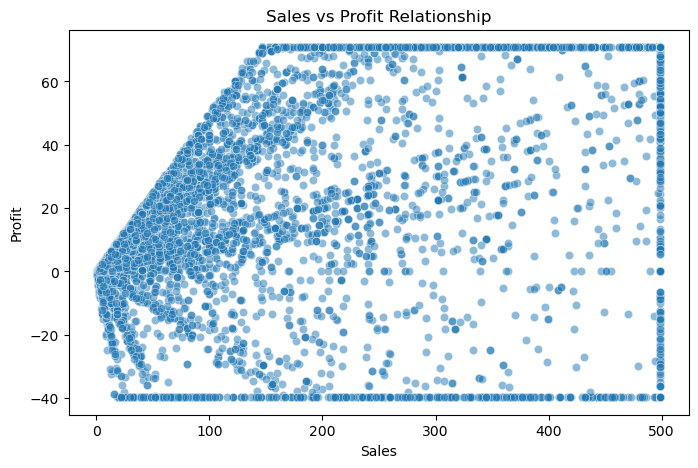

In [46]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Sales', y='Profit', data=df, alpha=0.5)
plt.title('Sales vs Profit Relationship')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


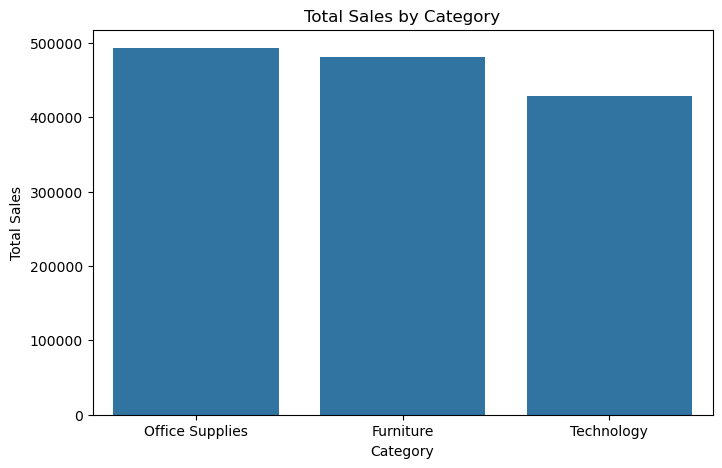

In [53]:
##Category-wise Sales

plt.figure(figsize=(8,5))
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()


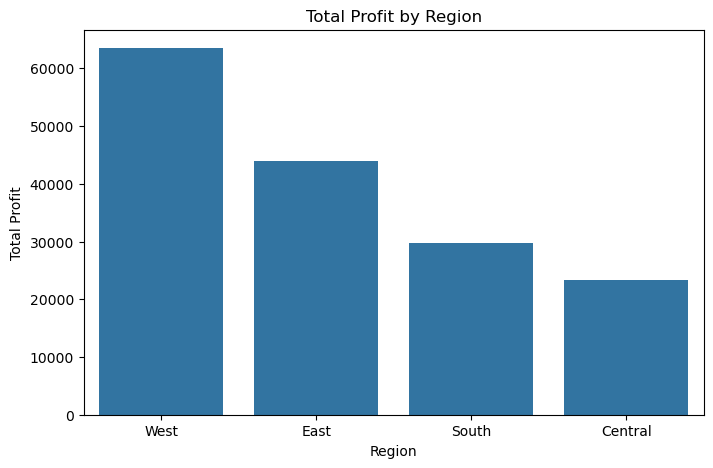

In [52]:
##Region-wise Profit

plt.figure(figsize=(8,5))
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
sns.barplot(x=region_profit.index, y=region_profit.values)
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()


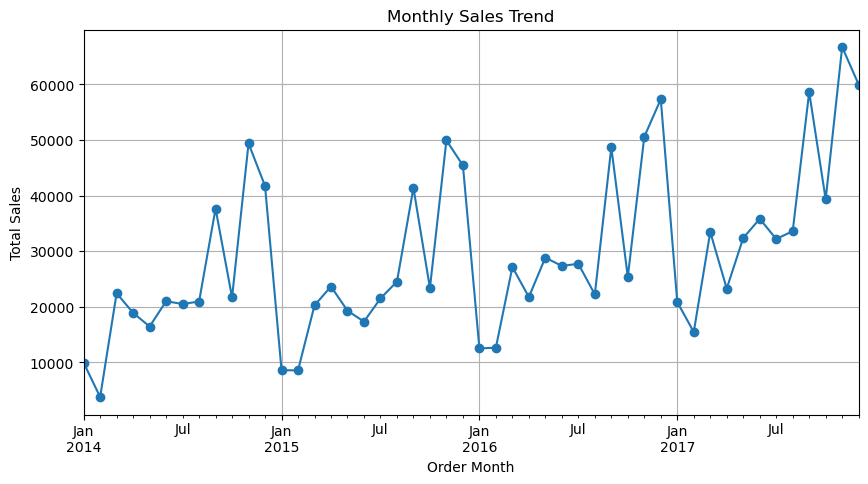

In [49]:
##Sales Trend Over Time (Order Date)

df['Order Date'] = pd.to_datetime(df['Order Date'])
sales_trend = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

plt.figure(figsize=(10,5))
sales_trend.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Order Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


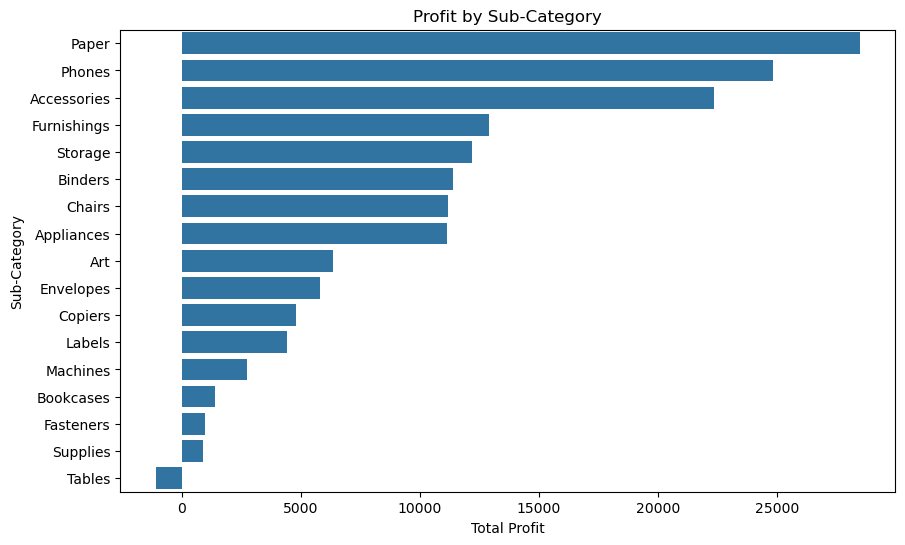

In [51]:
##Profit by Sub-Category

plt.figure(figsize=(10,6))
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
sns.barplot(x=subcat_profit.values, y=subcat_profit.index)
plt.title('Profit by Sub-Category')
plt.xlabel('Total Profit')
plt.ylabel('Sub-Category')
plt.show()


<Axes: xlabel='Category', ylabel='Profit'>

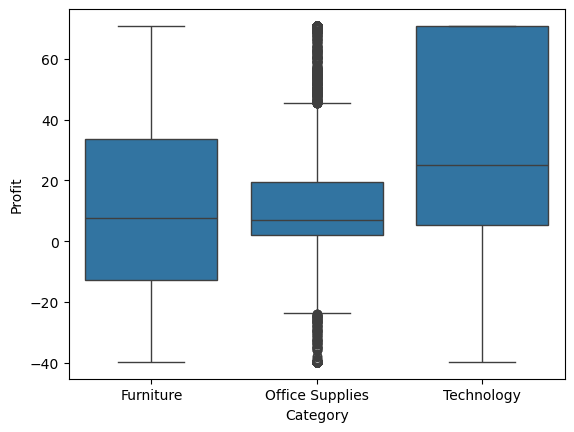

In [54]:
sns.boxplot(x='Category', y='Profit', data=df)


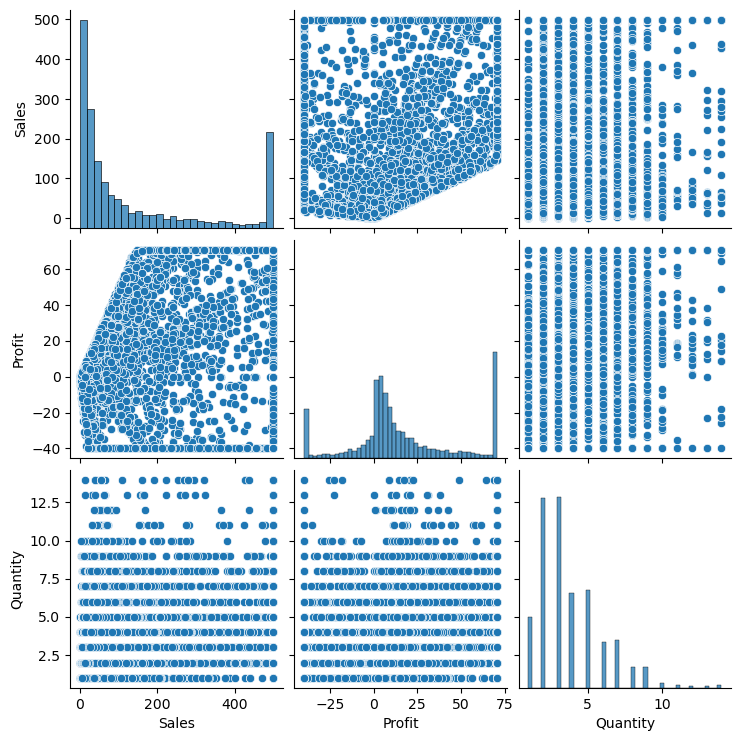

In [55]:
sns.pairplot(df[['Sales', 'Profit', 'Quantity']])


In [57]:
df[df['Region']=='West']

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,Region,Category,Sub-Category,Product Name,Sales,Quantity,Profit
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.871400
5,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.169400
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,West,Office Supplies,Art,Newell 322,7.280,4,1.965600
7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,West,Technology,Phones,Mitel 5320 IP Phone VoIP phone,498.930,6,70.816875
8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,West,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.782500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,CA-2016-125794,2016-09-29,2016-10-03,Standard Class,ML-17410,Consumer,United States,Los Angeles,West,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,15.220800
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,15.633200
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,West,Technology,Phones,Aastra 57i VoIP phone,258.576,2,19.393200
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,13.320000


In [63]:
df[(df['Category']=='Paper') & (df['Sales']>500)]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,Region,Category,Sub-Category,Product Name,Sales,Quantity,Profit


In [65]:
df[['Customer ID', 'Sales', 'Profit']]


,Customer ID,Sales,Profit
0,CG-12520,261.960,41.913600
1,CG-12520,498.930,70.816875
2,DV-13045,14.620,6.871400
3,SO-20335,498.930,-39.724125
4,SO-20335,22.368,2.516400
...,...,...,...
9989,TB-21400,25.248,4.102800
9990,DB-13060,91.960,15.633200
9991,DB-13060,258.576,19.393200
9992,DB-13060,29.600,13.320000


In [66]:
df[['Region','Category','Sales']]

,Region,Category,Sales
0,South,Furniture,261.960
1,South,Furniture,498.930
2,West,Office Supplies,14.620
3,South,Furniture,498.930
4,South,Office Supplies,22.368
...,...,...,...
9989,South,Furniture,25.248
9990,West,Furniture,91.960
9991,West,Technology,258.576
9992,West,Office Supplies,29.600


In [67]:
df.groupby('Region')['Sales'].sum()
df.groupby(['Category', 'Region'])['Profit'].mean()


Category         Region 
Furniture        Central    -2.154778
                 East       10.664004
                 South      20.994107
                 West       16.943035
Office Supplies  Central     8.114177
                 East       14.225651
                 South      13.318647
                 West       17.088763
Technology       Central    30.610139
                 East       24.590742
                 South      32.681528
                 West       31.906903
Name: Profit, dtype: float64

In [70]:
df.groupby('Category')['Sales'].sum()

Category
Furniture          480878.0084
Office Supplies    493104.0040
Technology         427987.3530
Name: Sales, dtype: float64

In [71]:
df.sort_values(by='Sales', ascending=False)


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,Region,Category,Sub-Category,Product Name,Sales,Quantity,Profit
2246,CA-2017-103380,2017-11-21,2017-11-25,Standard Class,BF-11005,Home Office,United States,Pasadena,West,Technology,Phones,Mitel MiVoice 5330e IP Phone,498.930,3,49.498200
1203,CA-2016-114727,2016-07-18,2016-07-24,Standard Class,LS-16945,Corporate,United States,Denver,West,Office Supplies,Storage,"Sauder Facets Collection Locker/File Cabinet, ...",498.930,2,0.000000
2534,US-2017-117723,2017-08-15,2017-08-18,Second Class,DL-13495,Corporate,United States,Philadelphia,East,Office Supplies,Storage,Tennsco Single-Tier Lockers,498.930,6,-39.724125
5763,CA-2015-162047,2015-11-03,2015-11-05,First Class,FH-14365,Corporate,United States,Long Beach,East,Furniture,Chairs,Office Star - Mid Back Dual function Ergonomic...,498.930,10,70.816875
5771,CA-2015-103835,2015-09-24,2015-09-28,Standard Class,SC-20440,Corporate,United States,Los Angeles,West,Office Supplies,Appliances,Hoover Upright Vacuum With Dirt Cup,498.930,4,70.816875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,US-2014-152723,2014-09-26,2014-09-26,Same Day,HG-14965,Corporate,United States,Mesquite,Central,Office Supplies,Binders,Acco 3-Hole Punch,0.876,1,-1.401600
4711,CA-2014-112403,2014-03-31,2014-03-31,Same Day,JO-15280,Consumer,United States,Philadelphia,East,Office Supplies,Binders,Avery Round Ring Poly Binders,0.852,1,-0.596400
8658,CA-2016-168361,2016-06-21,2016-06-25,Standard Class,KB-16600,Corporate,United States,Chicago,Central,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,0.836,1,-1.337600
9292,CA-2017-124114,2017-03-02,2017-03-02,Same Day,RS-19765,Corporate,United States,Waco,Central,Office Supplies,Binders,Acco Suede Grain Vinyl Round Ring Binder,0.556,1,-0.945200


In [74]:
df_output=df.groupby('Region')['Sales'].sum()
print(df_output)

Region
Central    311665.9234
East       399530.1040
South      228363.2555
West       462410.0825
Name: Sales, dtype: float64


In [80]:
df.groupby('Category')['Sales'].mean()

Category
Furniture          226.722305
Office Supplies     81.829407
Technology         231.720278
Name: Sales, dtype: float64

In [81]:
df['Profit']=df['Profit'].fillna(df['Profit'].mean())
print(df['Profit'])

0       41.913600
1       70.816875
2        6.871400
3      -39.724125
4        2.516400
          ...    
9989     4.102800
9990    15.633200
9991    19.393200
9992    13.320000
9993    70.816875
Name: Profit, Length: 9994, dtype: float64


In [84]:
df['Region']=df['Region'].str.strip()
df['Region']

0       South
1       South
2        West
3       South
4       South
        ...  
9989    South
9990     West
9991     West
9992     West
9993     West
Name: Region, Length: 9994, dtype: object